<a href="https://colab.research.google.com/github/AlexBB999/Classwork/blob/master/14_10_Challenege.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import the SQL ALchemy engine
from sqlalchemy import create_engine

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import boxcox
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats.mstats import winsorize
#from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings

In [0]:
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [0]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

In [0]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

In [0]:
life0 = pd.read_sql_query('select * FROm lifeexpectancy',con=engine)
#educate= engine.execute('SELECT * FROM useducation')
engine.dispose()

In [0]:
life1=life0.copy()

In [0]:
life1.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [0]:
life1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [0]:
len(list(life1))

22

In [0]:
life1['Status'].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

In [0]:
life1['Country'].nunique()

193

In [0]:
fill_list=list(life1)

In [0]:
fill_list

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [0]:
life1.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

**Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them**

**INTERPOLATION FOR MISSING VALUES**

In [0]:
fill_list=['Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

states = education_df["STATE"].unique()

for state in states:
    education_df.loc[education_df["STATE"] == state, fill_list] = education_df.loc[education_df["STATE"] == state, fill_list].interpolate()

# we drop the null values after interpolation
education_df.dropna(inplace=True)

In [0]:
countries = life1['Country'].unique()

for country in countries:
    life1.loc[life1["Country"] == country, fill_list] = life1.loc[life1["Country"] == country, fill_list].interpolate()

# we drop the null values after interpolation
life1.dropna(inplace=True)



In [0]:
life1.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.00000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000
mean,2006.984902,67.981782,175.187217,36.623553,4.455644,685.492318,73.86160,2729.561651,36.428636,50.932562,80.371917,5.902728,80.454454,2.274937,5392.335709,1.358390e+07,5.129995,5.199346,0.603453,11.639054
std,4.323147,9.706401,131.616942,138.784913,3.976733,1761.669050,29.02807,12102.389143,19.736138,188.933117,24.363376,2.287467,24.450153,6.005112,11480.810350,6.490113e+07,4.750149,4.844382,0.206026,3.212964
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.00000,0.000000,1.400000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,61.700000,75.000000,1.000000,0.830000,29.469887,64.00000,0.000000,18.150000,1.000000,74.000000,4.360000,75.500000,0.100000,384.553107,1.967480e+05,1.600000,1.600000,0.473000,9.700000
50%,2007.000000,69.900000,153.000000,4.000000,3.770000,104.314473,86.00000,20.000000,38.700000,4.000000,91.000000,5.800000,91.000000,0.100000,1334.651896,1.396861e+06,3.300000,3.400000,0.648000,11.900000
75%,2011.000000,74.700000,243.000000,25.000000,7.190000,470.870122,95.00000,499.500000,55.000000,36.000000,96.000000,7.385000,96.000000,1.400000,4441.530655,7.625918e+06,7.600000,7.700000,0.745000,13.700000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,18961.348600,99.00000,212183.000000,77.100000,2500.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.936000,20.700000


In [0]:
life1.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

**MISSING VALUES DONE**

**OUTLIERS**

**DISPLAY BOXPLOTS FOR ALL NUMERIC EXCEPT YEAR**

**A LOT OF OUTLIERS**

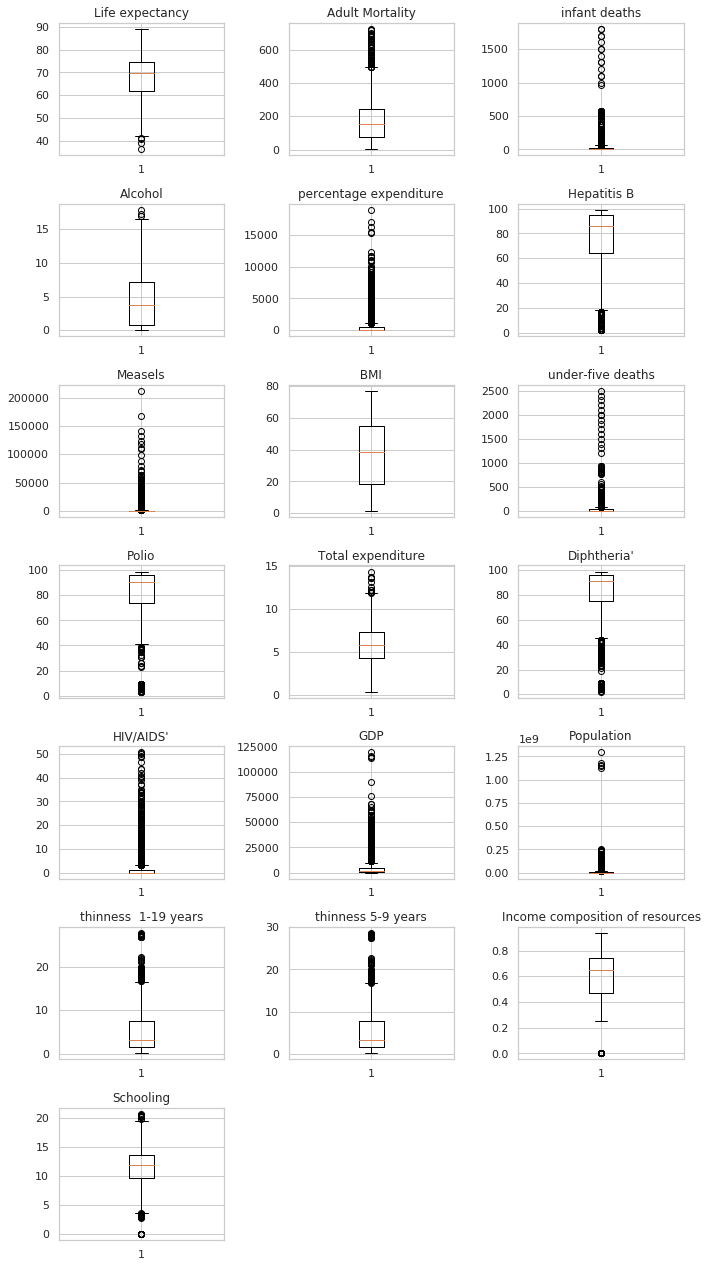

In [0]:
plt.figure(figsize=(10,20))
#plt.subplots_adjust(right=1,top=1,bottom=.2,wspace=2)

plt.subplot(8,3,1)
plt.boxplot(life1['Life expectancy '])
plt.title("Life expectancy")

plt.subplot(8,3,2)
plt.boxplot(life1['Adult Mortality'])
plt.title("Adult Mortality")

plt.subplot(8,3,3)
plt.boxplot(life1['infant deaths'])
plt.title('infant deaths')

plt.subplot(8,3,4)
plt.boxplot(life1['Alcohol'])
plt.title("Alcohol")

plt.subplot(8,3,5)
plt.boxplot(life1['percentage expenditure'])
plt.title("percentage expenditure")

plt.subplot(8,3,6)
plt.boxplot(life1['Hepatitis B'])
plt.title("Hepatitis B")

plt.subplot(8,3,7)
plt.boxplot(life1['Measles '])
plt.title("Measels")

plt.subplot(8,3,8)
plt.boxplot(life1[' BMI '])
plt.title(" BMI ")

plt.subplot(8,3,9)
plt.boxplot(life1['under-five deaths '])
plt.title("under-five deaths")

plt.subplot(8,3,10)
plt.boxplot(life1['Polio'])
plt.title("Polio")

plt.subplot(8,3,11)
plt.boxplot(life1['Total expenditure'])
plt.title("Total expenditure")

plt.subplot(8,3,12)
plt.boxplot(life1['Diphtheria '])
plt.title("Diphtheria'")

plt.subplot(8,3,13)
plt.boxplot(life1[' HIV/AIDS'])
plt.title("HIV/AIDS'")

plt.subplot(8,3,14)
plt.boxplot(life1['GDP'])
plt.title("GDP")

plt.subplot(8,3,15)
plt.boxplot(life1['Population'])
plt.title("Population")

plt.subplot(8,3,16)
plt.boxplot(life1[' thinness  1-19 years'])
plt.title("thinness  1-19 years")

plt.subplot(8,3,17)
plt.boxplot(life1[' thinness 5-9 years'])
plt.title("thinness 5-9 years")

plt.subplot(8,3,18)
plt.boxplot(life1['Income composition of resources'])
plt.title("Income composition of resources")

plt.subplot(8,3,19)
plt.boxplot(life1['Schooling'])
plt.title("Schooling")


plt.tight_layout()
plt.show()


**HISTOGRAM OF SAME FEATURES**

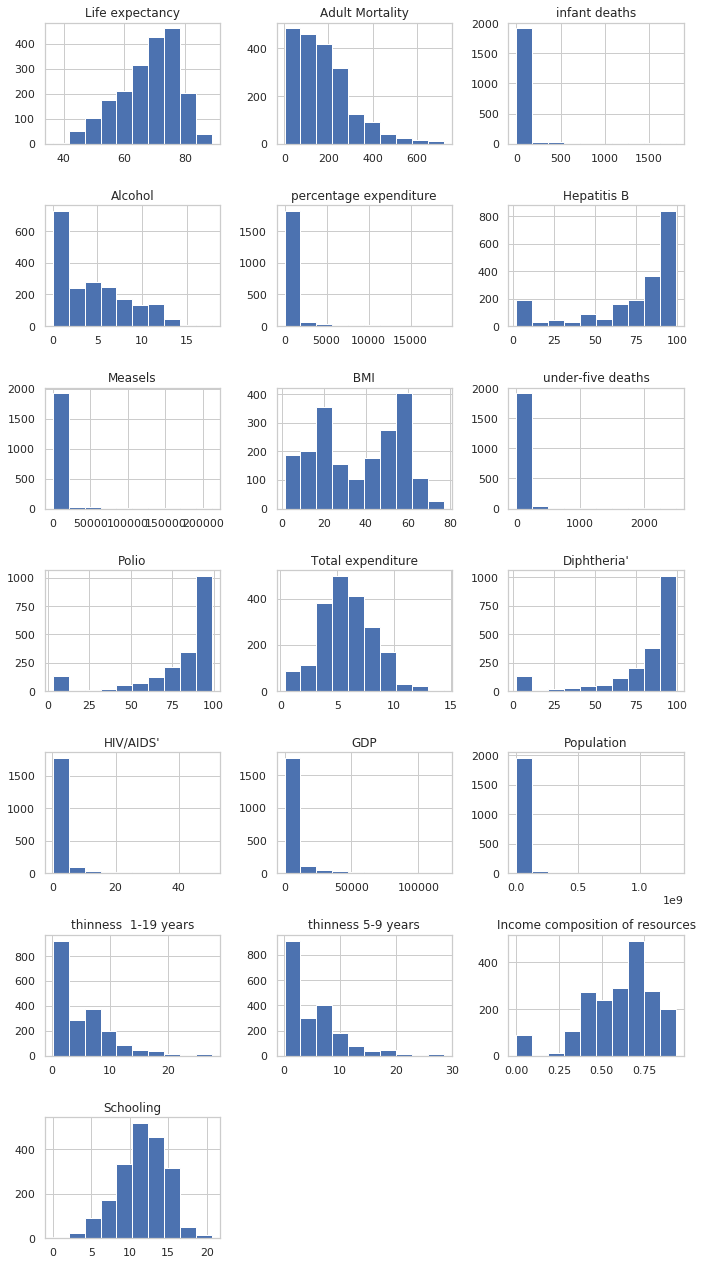

In [0]:
plt.figure(figsize=(10,20))
#plt.subplots_adjust(right=1,top=1,bottom=.2,wspace=2)

plt.subplot(8,3,1)
plt.hist(life1['Life expectancy '])
plt.title("Life expectancy")

plt.subplot(8,3,2)
plt.hist(life1['Adult Mortality'])
plt.title("Adult Mortality")

plt.subplot(8,3,3)
plt.hist(life1['infant deaths'])
plt.title('infant deaths')

plt.subplot(8,3,4)
plt.hist(life1['Alcohol'])
plt.title("Alcohol")

plt.subplot(8,3,5)
plt.hist(life1['percentage expenditure'])
plt.title("percentage expenditure")

plt.subplot(8,3,6)
plt.hist(life1['Hepatitis B'])
plt.title("Hepatitis B")

plt.subplot(8,3,7)
plt.hist(life1['Measles '])
plt.title("Measels")

plt.subplot(8,3,8)
plt.hist(life1[' BMI '])
plt.title(" BMI ")

plt.subplot(8,3,9)
plt.hist(life1['under-five deaths '])
plt.title("under-five deaths")

plt.subplot(8,3,10)
plt.hist(life1['Polio'])
plt.title("Polio")

plt.subplot(8,3,11)
plt.hist(life1['Total expenditure'])
plt.title("Total expenditure")

plt.subplot(8,3,12)
plt.hist(life1['Diphtheria '])
plt.title("Diphtheria'")

plt.subplot(8,3,13)
plt.hist(life1[' HIV/AIDS'])
plt.title("HIV/AIDS'")

plt.subplot(8,3,14)
plt.hist(life1['GDP'])
plt.title("GDP")

plt.subplot(8,3,15)
plt.hist(life1['Population'])
plt.title("Population")

plt.subplot(8,3,16)
plt.hist(life1[' thinness  1-19 years'])
plt.title("thinness  1-19 years")

plt.subplot(8,3,17)
plt.hist(life1[' thinness 5-9 years'])
plt.title("thinness 5-9 years")

plt.subplot(8,3,18)
plt.hist(life1['Income composition of resources'])
plt.title("Income composition of resources")

plt.subplot(8,3,19)
plt.hist(life1['Schooling'])
plt.title("Schooling")

plt.tight_layout()




**WINSORIZE TO ADDRESS OUTLIERS AND DISPLAY BOXPLOTS**

**LOOKS BETTER BUT ALL THE DISEASE FEATURES STILL HAVE MANY OUTLIERS**

In [0]:
for col in fill_list:
  life1[col]=winsorize(life1[col],(0.05,.15))
                       


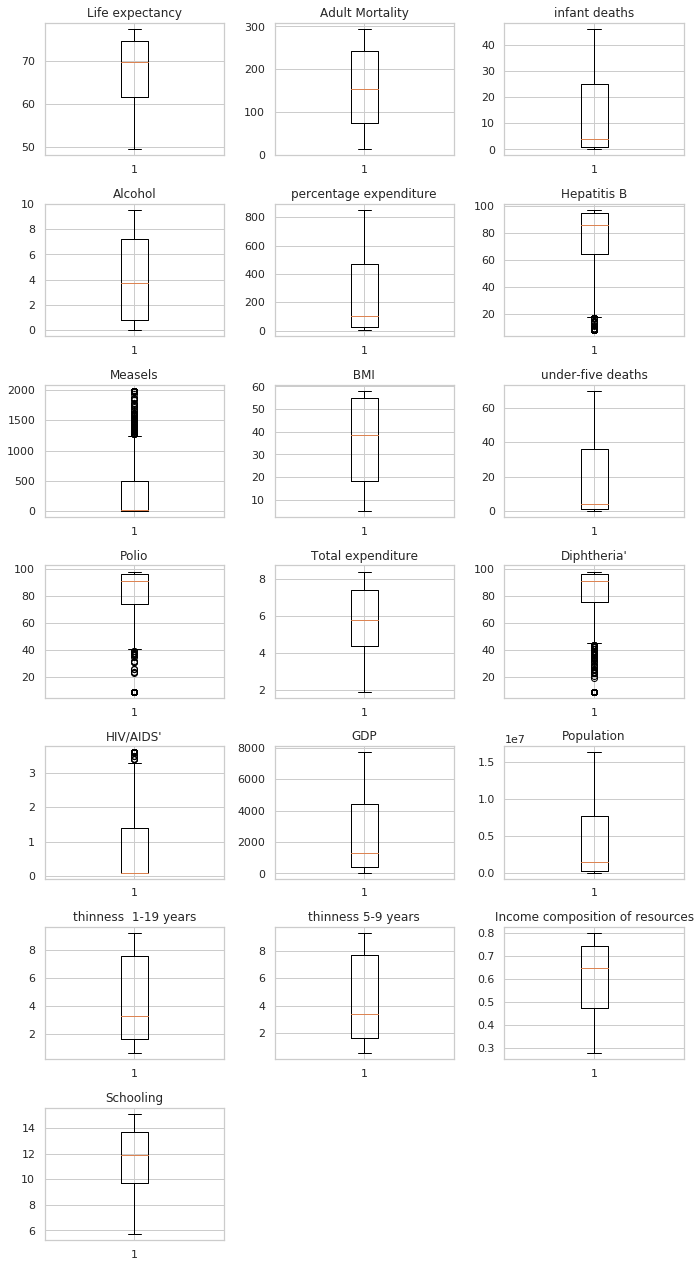

In [0]:
plt.figure(figsize=(10,20))
#plt.subplots_adjust(right=1,top=1,bottom=.2,wspace=2)

plt.subplot(8,3,1)
plt.boxplot(life1['Life expectancy '])
plt.title("Life expectancy")

plt.subplot(8,3,2)
plt.boxplot(life1['Adult Mortality'])
plt.title("Adult Mortality")

plt.subplot(8,3,3)
plt.boxplot(life1['infant deaths'])
plt.title('infant deaths')

plt.subplot(8,3,4)
plt.boxplot(life1['Alcohol'])
plt.title("Alcohol")

plt.subplot(8,3,5)
plt.boxplot(life1['percentage expenditure'])
plt.title("percentage expenditure")

plt.subplot(8,3,6)
plt.boxplot(life1['Hepatitis B'])
plt.title("Hepatitis B")

plt.subplot(8,3,7)
plt.boxplot(life1['Measles '])
plt.title("Measels")

plt.subplot(8,3,8)
plt.boxplot(life1[' BMI '])
plt.title(" BMI ")

plt.subplot(8,3,9)
plt.boxplot(life1['under-five deaths '])
plt.title("under-five deaths")

plt.subplot(8,3,10)
plt.boxplot(life1['Polio'])
plt.title("Polio")

plt.subplot(8,3,11)
plt.boxplot(life1['Total expenditure'])
plt.title("Total expenditure")

plt.subplot(8,3,12)
plt.boxplot(life1['Diphtheria '])
plt.title("Diphtheria'")

plt.subplot(8,3,13)
plt.boxplot(life1[' HIV/AIDS'])
plt.title("HIV/AIDS'")

plt.subplot(8,3,14)
plt.boxplot(life1['GDP'])
plt.title("GDP")

plt.subplot(8,3,15)
plt.boxplot(life1['Population'])
plt.title("Population")

plt.subplot(8,3,16)
plt.boxplot(life1[' thinness  1-19 years'])
plt.title("thinness  1-19 years")

plt.subplot(8,3,17)
plt.boxplot(life1[' thinness 5-9 years'])
plt.title("thinness 5-9 years")

plt.subplot(8,3,18)
plt.boxplot(life1['Income composition of resources'])
plt.title("Income composition of resources")

plt.subplot(8,3,19)
plt.boxplot(life1['Schooling'])
plt.title("Schooling")


plt.tight_layout()
plt.show()

**HISTOGRAMS AFTER WINZORIZING**

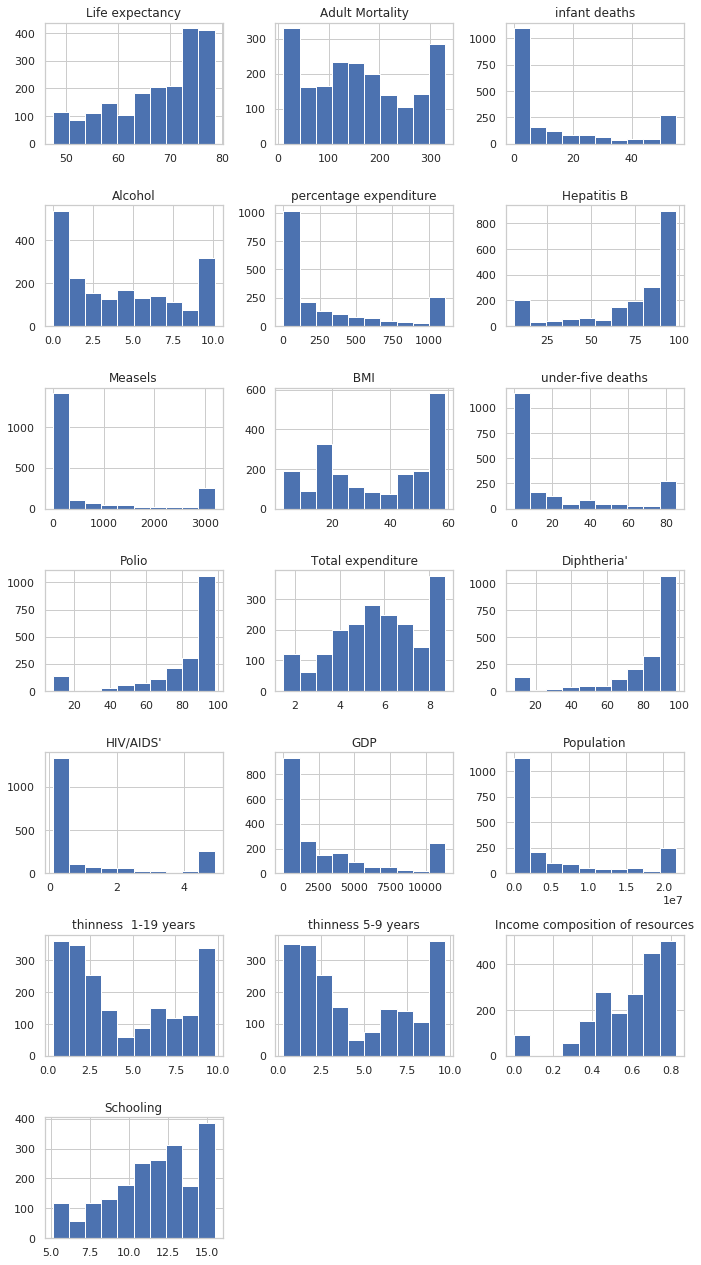

In [0]:
plt.figure(figsize=(10,20))
#plt.subplots_adjust(right=1,top=1,bottom=.2,wspace=2)

plt.subplot(8,3,1)
plt.hist(life1['Life expectancy '])
plt.title("Life expectancy")

plt.subplot(8,3,2)
plt.hist(life1['Adult Mortality'])
plt.title("Adult Mortality")

plt.subplot(8,3,3)
plt.hist(life1['infant deaths'])
plt.title('infant deaths')

plt.subplot(8,3,4)
plt.hist(life1['Alcohol'])
plt.title("Alcohol")

plt.subplot(8,3,5)
plt.hist(life1['percentage expenditure'])
plt.title("percentage expenditure")

plt.subplot(8,3,6)
plt.hist(life1['Hepatitis B'])
plt.title("Hepatitis B")

plt.subplot(8,3,7)
plt.hist(life1['Measles '])
plt.title("Measels")

plt.subplot(8,3,8)
plt.hist(life1[' BMI '])
plt.title(" BMI ")

plt.subplot(8,3,9)
plt.hist(life1['under-five deaths '])
plt.title("under-five deaths")

plt.subplot(8,3,10)
plt.hist(life1['Polio'])
plt.title("Polio")

plt.subplot(8,3,11)
plt.hist(life1['Total expenditure'])
plt.title("Total expenditure")

plt.subplot(8,3,12)
plt.hist(life1['Diphtheria '])
plt.title("Diphtheria'")

plt.subplot(8,3,13)
plt.hist(life1[' HIV/AIDS'])
plt.title("HIV/AIDS'")

plt.subplot(8,3,14)
plt.hist(life1['GDP'])
plt.title("GDP")

plt.subplot(8,3,15)
plt.hist(life1['Population'])
plt.title("Population")

plt.subplot(8,3,16)
plt.hist(life1[' thinness  1-19 years'])
plt.title("thinness  1-19 years")

plt.subplot(8,3,17)
plt.hist(life1[' thinness 5-9 years'])
plt.title("thinness 5-9 years")

plt.subplot(8,3,18)
plt.hist(life1['Income composition of resources'])
plt.title("Income composition of resources")

plt.subplot(8,3,19)
plt.hist(life1['Schooling'])
plt.title("Schooling")

plt.tight_layout()


////////////////////////////////////////////////////////////////////////////////////////////

**LOG TRANSFORMATIONS AND BOXPLOTS**

**DISEASE FEATURES STILL HAVE MANY OUTLIERS**

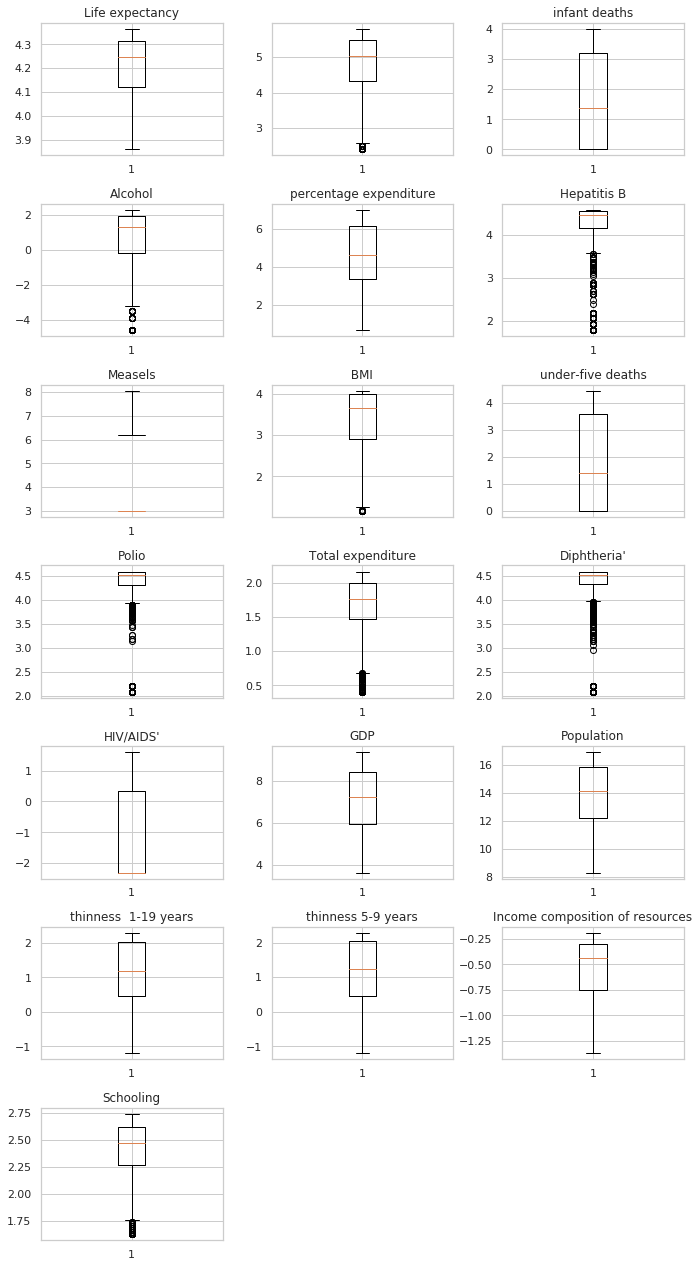

In [0]:
plt.figure(figsize=(10,20))
#plt.subplots_adjust(right=1,top=1,bottom=.2,wspace=2)

plt.subplot(8,3,1)
plt.boxplot(np.log(life1['Life expectancy ']))
plt.title("Life expectancy")

plt.subplot(8,3,2)
plt.boxplot(np.log(life1['Adult Mortality']))

plt.subplot(8,3,3)
plt.boxplot(np.log(life1['infant deaths']))
plt.title('infant deaths')

plt.subplot(8,3,4)
plt.boxplot(np.log(life1['Alcohol']))
plt.title("Alcohol")

plt.subplot(8,3,5)
plt.boxplot(np.log(life1['percentage expenditure']))
plt.title("percentage expenditure")

plt.subplot(8,3,6)
plt.boxplot(np.log(life1['Hepatitis B']))
plt.title("Hepatitis B")

plt.subplot(8,3,7)
plt.boxplot(np.log(life1['Measles ']))
plt.title("Measels")

plt.subplot(8,3,8)
plt.boxplot(np.log(life1[' BMI ']))
plt.title(" BMI ")

plt.subplot(8,3,9)
plt.boxplot(np.log(life1['under-five deaths ']))
plt.title("under-five deaths")

plt.subplot(8,3,10)
plt.boxplot(np.log(life1['Polio']))
plt.title("Polio")

plt.subplot(8,3,11)
plt.boxplot(np.log(life1['Total expenditure']))
plt.title("Total expenditure")

plt.subplot(8,3,12)
plt.boxplot(np.log(life1['Diphtheria ']))
plt.title("Diphtheria'")

plt.subplot(8,3,13)
plt.boxplot(np.log(life1[' HIV/AIDS']))
plt.title("HIV/AIDS'")

plt.subplot(8,3,14)
plt.boxplot(np.log(life1['GDP']))
plt.title("GDP")

plt.subplot(8,3,15)
plt.boxplot(np.log(life1['Population']))
plt.title("Population")

plt.subplot(8,3,16)
plt.boxplot(np.log(life1[' thinness  1-19 years']))
plt.title("thinness  1-19 years")

plt.subplot(8,3,17)
plt.boxplot(np.log(life1[' thinness 5-9 years']))
plt.title("thinness 5-9 years")

plt.subplot(8,3,18)
plt.boxplot(np.log(life1['Income composition of resources']))
plt.title("Income composition of resources")

plt.subplot(8,3,19)
plt.boxplot(np.log(life1['Schooling']))
plt.title("Schooling")

plt.tight_layout()
plt.show()


**WINZORING PERFORMED BETTER THAN LOG-NORMAL BUT STILL NEED TO DEAL WITH DISEASE OUTLIERS**

**I WILL USE MEDIAN ON DISEASE FEATURES TO HANDLE OUTLIERS**

In [0]:
disease_fill_list =['Hepatitis B', 'Measles ',  'Polio',  'Diphtheria ', ' HIV/AIDS']

In [0]:
for col in disease_fill_list:
  life1[col]=life1[col].median()

**LOOK AT BOXPLOTS AGAIN AFTER WINZORIZATION**

**NO MORE OUTLIERS**



In [0]:
for col in fill_list:
  life1[col]=winsorize(life1[col],(0.05,.15))
                       

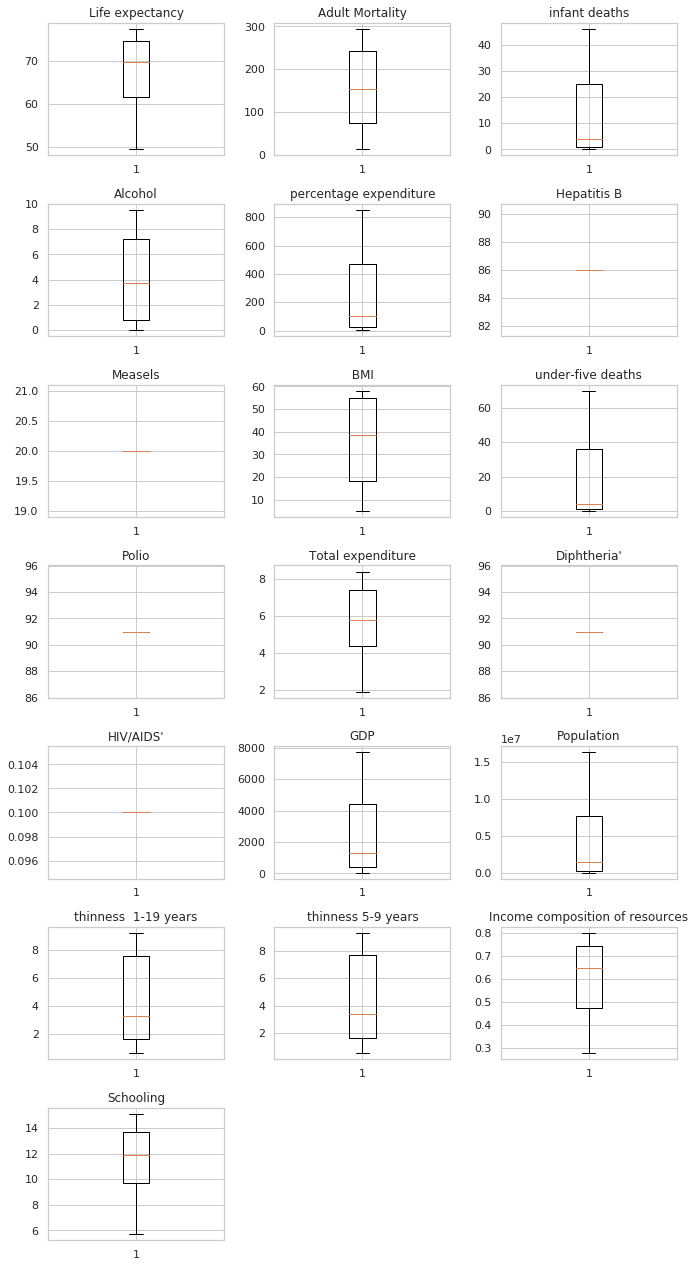

In [0]:
plt.figure(figsize=(10,20))
#plt.subplots_adjust(right=1,top=1,bottom=.2,wspace=2)

plt.subplot(8,3,1)
plt.boxplot(life1['Life expectancy '])
plt.title("Life expectancy")

plt.subplot(8,3,2)
plt.boxplot(life1['Adult Mortality'])
plt.title("Adult Mortality")

plt.subplot(8,3,3)
plt.boxplot(life1['infant deaths'])
plt.title('infant deaths')

plt.subplot(8,3,4)
plt.boxplot(life1['Alcohol'])
plt.title("Alcohol")

plt.subplot(8,3,5)
plt.boxplot(life1['percentage expenditure'])
plt.title("percentage expenditure")

plt.subplot(8,3,6)
plt.boxplot(life1['Hepatitis B'])
plt.title("Hepatitis B")

plt.subplot(8,3,7)
plt.boxplot(life1['Measles '])
plt.title("Measels")

plt.subplot(8,3,8)
plt.boxplot(life1[' BMI '])
plt.title(" BMI ")

plt.subplot(8,3,9)
plt.boxplot(life1['under-five deaths '])
plt.title("under-five deaths")

plt.subplot(8,3,10)
plt.boxplot(life1['Polio'])
plt.title("Polio")

plt.subplot(8,3,11)
plt.boxplot(life1['Total expenditure'])
plt.title("Total expenditure")

plt.subplot(8,3,12)
plt.boxplot(life1['Diphtheria '])
plt.title("Diphtheria'")

plt.subplot(8,3,13)
plt.boxplot(life1[' HIV/AIDS'])
plt.title("HIV/AIDS'")

plt.subplot(8,3,14)
plt.boxplot(life1['GDP'])
plt.title("GDP")

plt.subplot(8,3,15)
plt.boxplot(life1['Population'])
plt.title("Population")

plt.subplot(8,3,16)
plt.boxplot(life1[' thinness  1-19 years'])
plt.title("thinness  1-19 years")

plt.subplot(8,3,17)
plt.boxplot(life1[' thinness 5-9 years'])
plt.title("thinness 5-9 years")

plt.subplot(8,3,18)
plt.boxplot(life1['Income composition of resources'])
plt.title("Income composition of resources")

plt.subplot(8,3,19)
plt.boxplot(life1['Schooling'])
plt.title("Schooling")


plt.tight_layout()
plt.show()

In [0]:
life1.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.0,1987.0,1987.000000,1987.000000,1987.0,1987.000000,1987.0,1.987000e+03,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000
mean,2006.984902,67.635481,157.548566,13.635632,4.155508,271.580943,86.0,20.0,35.851636,19.690488,91.0,5.746739,91.0,1.000000e-01,2647.505977,4.702877e+06,4.442778,4.492552,0.606953,11.525466
std,4.323147,8.695660,94.741606,17.094050,3.424450,309.299045,0.0,0.0,18.644280,25.848352,0.0,1.921460,0.0,3.525845e-15,2764.611819,6.027911e+06,3.151593,3.185237,0.162107,2.755018
min,2000.000000,49.400000,13.000000,0.000000,0.010000,3.595980,86.0,20.0,5.100000,0.000000,91.0,1.900000,91.0,1.000000e-01,53.277222,8.486000e+03,0.600000,0.500000,0.276000,5.700000
25%,2003.000000,61.700000,75.000000,1.000000,0.830000,29.469887,86.0,20.0,18.150000,1.000000,91.0,4.360000,91.0,1.000000e-01,384.553107,1.967480e+05,1.600000,1.600000,0.473000,9.700000
50%,2007.000000,69.900000,153.000000,4.000000,3.770000,104.314473,86.0,20.0,38.700000,4.000000,91.0,5.800000,91.0,1.000000e-01,1334.651896,1.396861e+06,3.300000,3.400000,0.648000,11.900000
75%,2011.000000,74.700000,243.000000,25.000000,7.190000,470.870122,86.0,20.0,55.000000,36.000000,91.0,7.385000,91.0,1.000000e-01,4441.530655,7.625918e+06,7.600000,7.700000,0.745000,13.700000
max,2015.000000,77.500000,294.000000,46.000000,9.530000,851.450672,86.0,20.0,58.100000,70.000000,91.0,8.390000,91.0,1.000000e-01,7716.241500,1.632158e+07,9.200000,9.300000,0.800000,15.100000


**Explore the data using univariate and multivariate exploration techniques.**

**You should pay special attention to your target variable.**

 **In this regard, your focus should be on finding the relevant variables that may affect life expectancy.**

In [0]:
life1_sub=life1[['Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']]

In [0]:
life1_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2937
Data columns (total 19 columns):
Life expectancy                    1987 non-null float64
Adult Mortality                    1987 non-null float64
infant deaths                      1987 non-null int64
Alcohol                            1987 non-null float64
percentage expenditure             1987 non-null float64
Hepatitis B                        1987 non-null float64
Measles                            1987 non-null float64
 BMI                               1987 non-null float64
under-five deaths                  1987 non-null int64
Polio                              1987 non-null float64
Total expenditure                  1987 non-null float64
Diphtheria                         1987 non-null float64
 HIV/AIDS                          1987 non-null float64
GDP                                1987 non-null float64
Population                         1987 non-null float64
 thinness  1-19 years              1987 no

In [0]:
life1_sub.isnull().sum()

Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

**HEATMAP OF ALL CORRELATIONS**

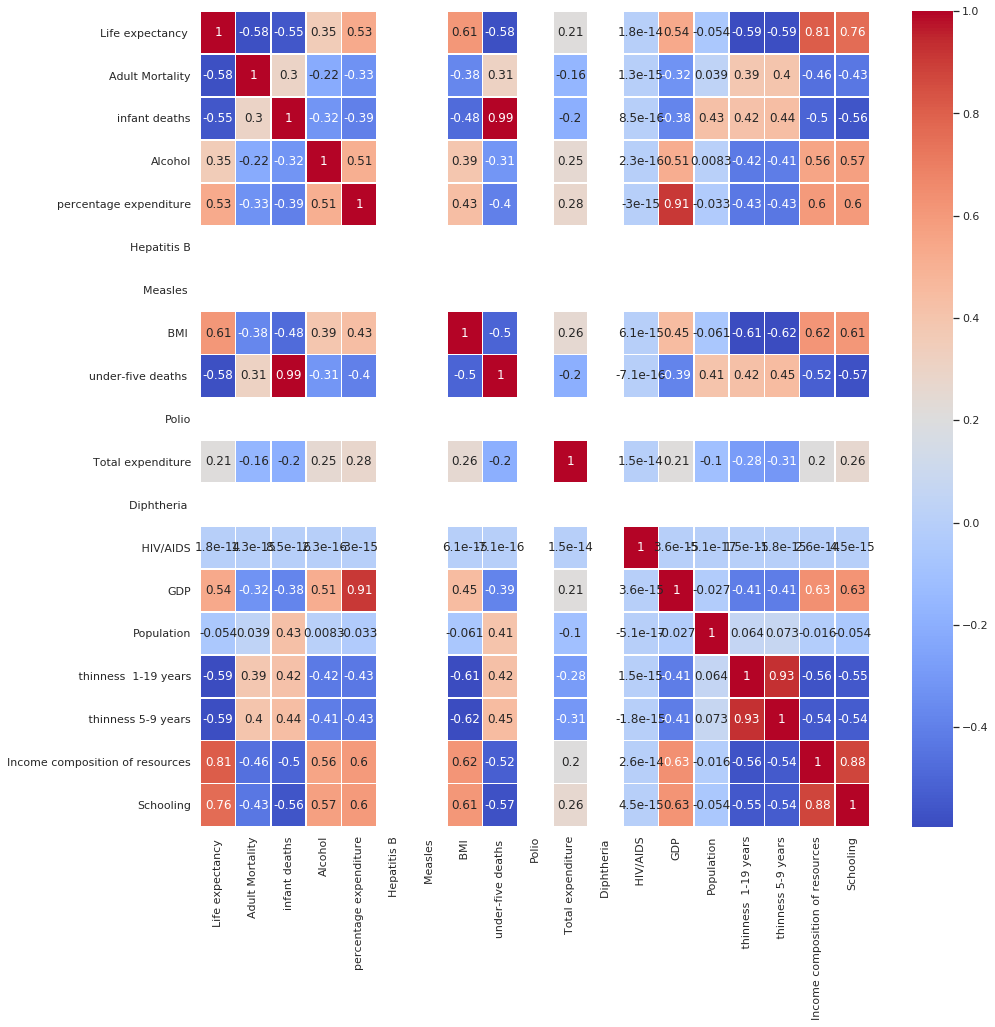

In [56]:
plt.figure(figsize=(15,15))
#sns.heatmap(life1_sub)
sns.heatmap(life1_sub.corr(),linewidth=0.5,cmap='coolwarm',annot=True, robust=True)

**life expectancy highest correlations are -- in order--**

**income composition of resourses, schooling, BMI, GDP, percent expenditure, alcohol**

**life expectancy lowest correlation are-- in order**

**thiness 1-19, thiness 5-9,adult mortality, infant deaths, under 5 mortality**

In [0]:
life1_sub_negative=life1[['Life expectancy ','Adult Mortality','infant deaths','under-five deaths ',' thinness  1-19 years',' thinness 5-9 years']]

**HEATMAP OF FEATURES NEGATIVELY CORRECLATED WITH LIFE EXPECTANCY**

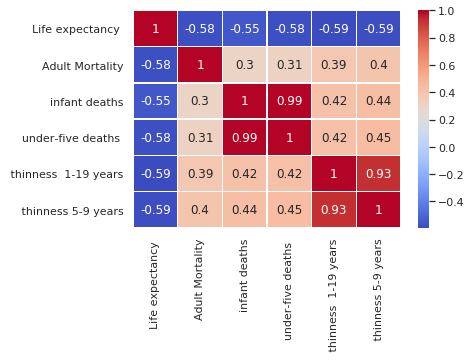

In [96]:
sns.heatmap(life1_sub_negative.corr(),linewidth=0.5,cmap='coolwarm',annot=True, robust=True)

In [0]:
life1_sub2=life1[['Life expectancy ','Income composition of resources','Schooling',' BMI ','percentage expenditure',  'GDP','Alcohol']]

**HEATMAP OF FEATURES POSITIVELY CORRECLATED WITH LIFE EXPECTANCY**

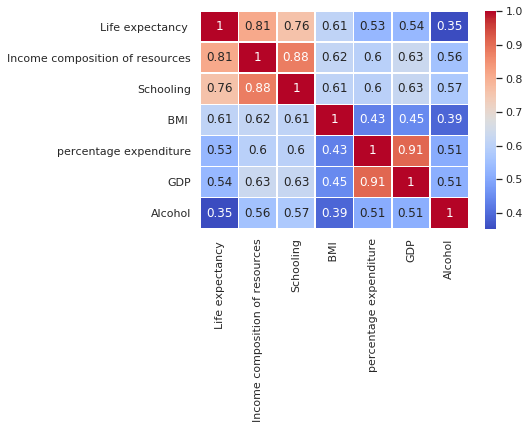

In [74]:
sns.heatmap(life1_sub2.corr(),linewidth=0.5,cmap='coolwarm',annot=True, robust=True)

**In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase.**

 **More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.**

**GDP AND PERCENTAGE EXPENDITURE ARE HIGHLY CORRELATED (91%) SO I WILL DROP "PERCENTAGE EXPENDITURE"**

**SEVERAL OF THE FACTORS THAT REDUCE LIFE EXPECTANCY HAVE IDENTICAL CORRELATIONS SO I WILL DROP "THINESS 1-19" AND "ADULT MORTALITY"**

/////////////////////////////////////////////////////////////////////////////////////////////////////////////


**Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language.** 

**In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.**

In [0]:
life1_sub3=life1[['Life expectancy ','Income composition of resources','Schooling','GDP','Alcohol']]

**THIS HEATMAP DISPLAYS FACTORS THAT HAVE THE HIGHEST POSITIVE AFFECT ON LIFE EXPECTANCY**

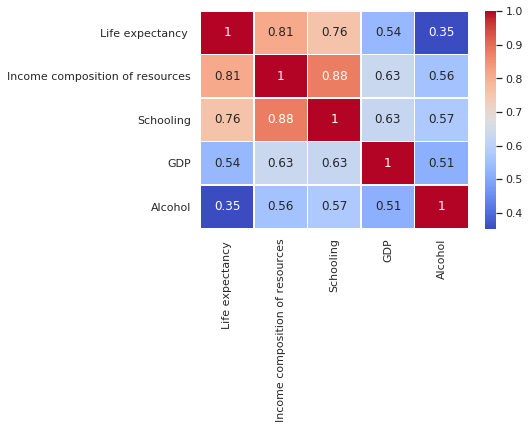

In [81]:
sns.heatmap(life1_sub3.corr(),linewidth=0.5,cmap='coolwarm',annot=True, robust=True)

In [0]:
life1_sub_negative2=life1[['Life expectancy ',' thinness 5-9 years','under-five deaths ','infant deaths']]

**THIS HEATMAP DISPLAYS FACTORS THAT HAVE THE HIGHEST NEGATIVE AFFECT ON LIFE EXPECTANCY**

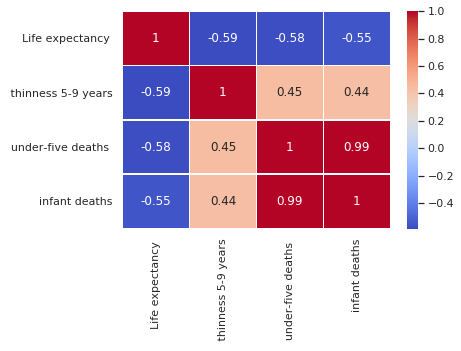

In [103]:
sns.heatmap(life1_sub_negative2.corr(),linewidth=0.5,cmap='coolwarm',annot=True, robust=True)